In [1]:
import sys
sys.path.append('../')

import regex as re
import pandas as pd
from src.utils.preprocessing import (load_data,
                                    save_data,
                                    build_combined_discharge,
                                    get_bhc_input,
                                    extract_clean_inputs,
                                    remove_unecessary_tokens)

from src.utils.token_count import get_token_list, get_token_count, plot_token_count
from src.utils.format_change import dataframe_to_jsonl
from tqdm import tqdm
tqdm.pandas()

%load_ext autoreload
%autoreload 2

In [2]:
data_path = '../data/'

In [3]:
train_discharge = load_data(data_path + 'train/discharge.csv.gz')
train_targets = load_data(data_path + 'train/discharge_target.csv.gz')
train_combined_discharge = build_combined_discharge(train_discharge, train_targets)

valid_discharge = load_data(data_path + 'valid/discharge.csv.gz')
valid_targets = load_data(data_path + 'valid/discharge_target.csv.gz') 
valid_combined_discharge = build_combined_discharge(valid_discharge, valid_targets)

test_discharge = load_data(data_path + 'test_phase_1/discharge.csv.gz')
test_targets = load_data(data_path + 'test_phase_1/discharge_target.csv.gz')
test_combined_discharge = build_combined_discharge(test_discharge, test_targets)

print(len(train_combined_discharge))
print(len(valid_combined_discharge))
print(len(test_combined_discharge))

68785
14719
14702


In [7]:
section_candidate = ['history_of_present_illness','past_medical_history','physical_exam','pertinent_results']
section_test_df = pd.DataFrame()

for section in section_candidate:
    section_test_df[section] = extract_clean_inputs(test_combined_discharge, features_to_include=[section])
    section_test_df[section].progress_apply(remove_unecessary_tokens)
    section_test_df[section + '_tokens'] = section_test_df[section].progress_apply(get_token_count)

  0%|          | 0/14702 [00:00<?, ?it/s]

100%|██████████| 14702/14702 [00:13<00:00, 1117.06it/s]


In [8]:
section_test_df

,history_of_present_illness,history_of_present_illness_tokens,past_medical_history,past_medical_history_tokens,physical_exam,physical_exam_tokens,pertinent_results,pertinent_results_tokens
0,\n\nHistory of Present Illness: \nREASON FOR C...,112,\n\nPast Medical History: \n- GERD \n - Hyper...,65,\n\nPhysical Exam: \nGeneral: Well-appearing f...,26,\n\nPertinent Results: \n,11
1,\n\nHistory of Present Illness: \nThis is a __...,576,\n\nPast Medical History: \nPMH: \n# high grad...,135,\n\nPhysical Exam: \nAdmission Physical Exam: ...,570,\n\nPertinent Results: \nADMIT LABS:\n\n___ 04...,332
2,\n\nHistory of Present Illness: \n___ year old...,1056,\n\nPast Medical History: \n- hypertension \n...,122,\n\nPhysical Exam: \nADMISSION PHYSICAL EXAM:\...,620,\n\nPertinent Results: \n==== ADMISSION LABS =...,467
3,\n\nHistory of Present Illness: \nMs. ___ is a...,382,\n\nPast Medical History: \n- Hypertension \n...,261,\n\nPhysical Exam: \nADMISSION EXAM:\n========...,451,\n\nPertinent Results: \nADMISSION LABS:\n====...,460
4,\n\nHistory of Present Illness: \n___ y/o fema...,443,\n\nPast Medical History: \n- Hypertension \n...,261,\n\nPhysical Exam: \n=========================...,376,\n\nPertinent Results: \n================\nADM...,815
...,...,...,...,...,...,...,...,...
14697,\n\nHistory of Present Illness: \nThis is a __...,744,\n\nPast Medical History: \n1. Transient AV di...,256,\n\nPhysical Exam: \nADMIT EXAM:\nVITALS: 98.2...,385,\n\nPertinent Results: \nIMAGING:\nCXR ___ opa...,167
14698,"\n\nHistory of Present Illness: \nBriefly, thi...",437,\n\nPast Medical History: \n___: in ___ ophth ...,154,\n\nPhysical Exam: \nADMISSION PHYSICAL EXAM,21,\n\nPertinent Results: \nADMISSION LABS\n___ 0...,720
14699,\n\nHistory of Present Illness: \n___ F with a...,542,\n\nPast Medical History: \nCardiac Risk Facto...,249,\n\nPhysical Exam: \nAdmission Physical Exam:\...,429,\n\nPertinent Results: \nAdmission Labs:\n----...,338
14700,\n\nHistory of Present Illness: \nMr. ___ is a...,665,\n\nPast Medical History: \nPAST ONCOLOGIC HIS...,274,\n\nPhysical Exam: \nADMISSION PHYSICAL EXAM: ...,211,\n\nPertinent Results: \nINITIAL LABS: \n___ 1...,1616


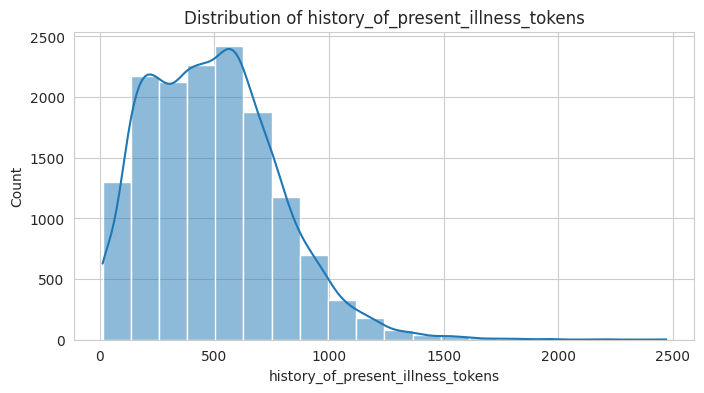

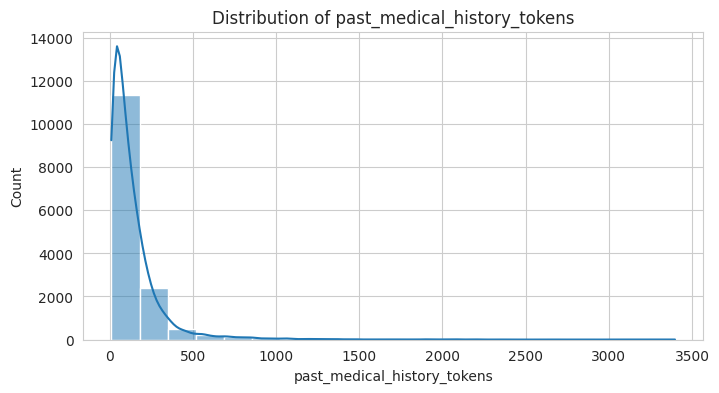

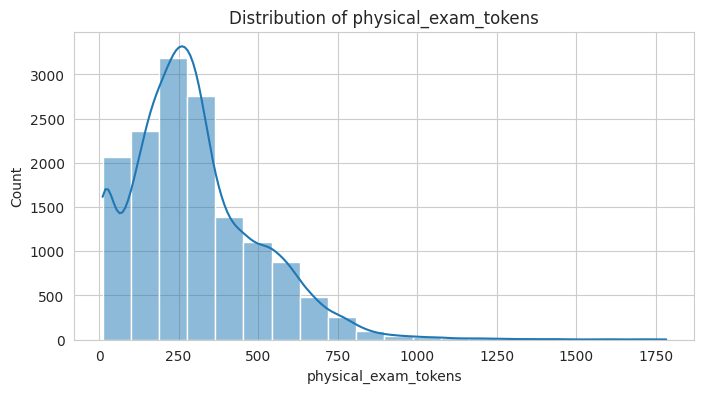

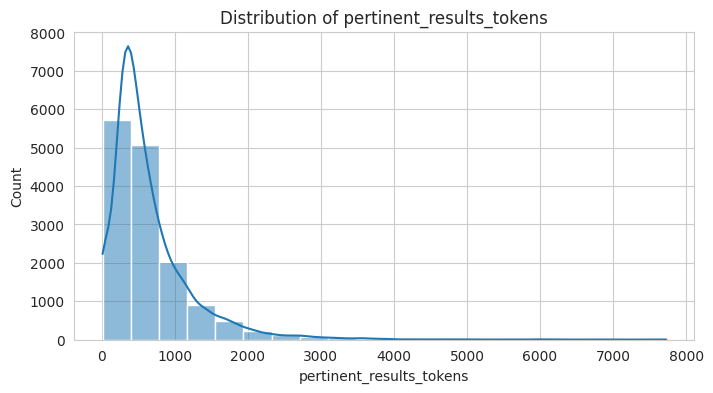

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = section_test_df[['history_of_present_illness_tokens', 'past_medical_history_tokens', 'physical_exam_tokens', 'pertinent_results_tokens']]

sns.set_style("whitegrid")

for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

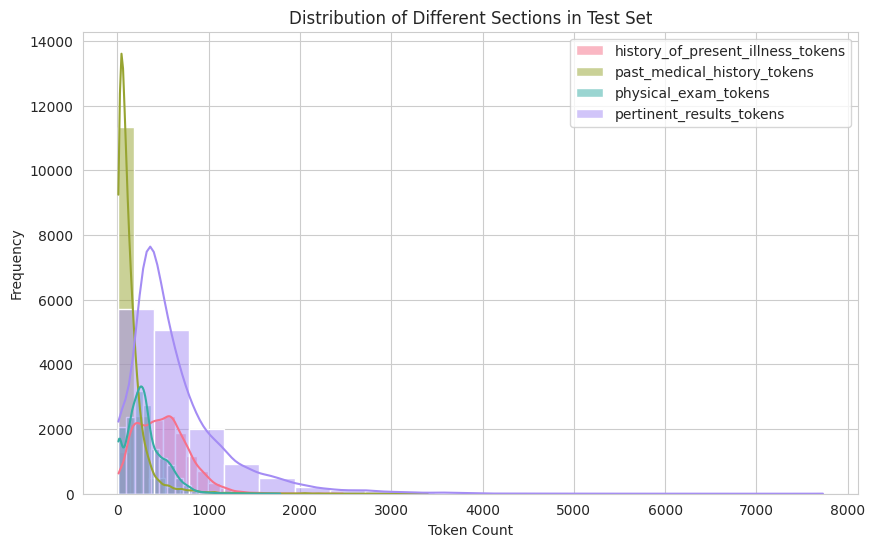

In [12]:
df = section_test_df[['history_of_present_illness_tokens', 'past_medical_history_tokens', 'physical_exam_tokens', 'pertinent_results_tokens']]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, bins=20, alpha=0.5, color=sns.color_palette("husl", 4)[i], label=column)

plt.title('Distribution of Different Sections in Test Set')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()